<a href="https://colab.research.google.com/github/ashley-ferreira/PHYS449_FinalProject/blob/main/notebooks/Individual_Feature_Map_extraction_of_v2_Testing_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install astroNN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.3 MB 9.5 MB/s 
     |████████████████████████████████| 4.5 MB 39.4 MB/s 
     |████████████████████████████████| 832 kB 58.5 MB/s 
     |████████████████████████████████| 48 kB 5.0 MB/s 
     |████████████████████████████████| 4.0 MB 36.5 MB/s 
  Created wheel for astroNN: filename=astroNN-1.0.1-py3-none-any.whl size=9284593 sha256=acf39cd5493afce8484138595c04d370c8390620772dade6be4a6f8fba50a437
  Stored in directory: /root/.cache/pip/wheels/26/a4/7e/4cbf2a7f9cd51929da9d09345e8cd37c647b54825a1314dd2d
Successfully built astroNN


In [ ]:
from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
#from tensorflow.keras.layers import BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tqdm import tqdm

WARNING! APOGEE environment variable SDSS_LOCAL_SAS_MIRROR not set
WARNING! Gaia environment variable GAIA_TOOLS_DATA not set


# **Loading data**

In [ ]:
images, labels = galaxy10.load_data()
labels = labels.astype(np.float32)
labels = to_categorical(labels)
images = images.astype(np.float32)
images = images/255

/root/.astroNN/datasets/Galaxy10.h5 was found!


# **Sample data**

In [ ]:
label = galaxy10cls_lookup(int(9))
print(label)

Disk, Face-on, Loose Spiral


In [ ]:
print(labels[:5])
#label_name = np.array([np.where(label[i]==1.)[0] for i in range(len(labels))])
label_num_pos = int(np.where(labels[0]==1)[0])
print(label_num_pos)
print(labels[0])
#print(label_name[:10])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


110


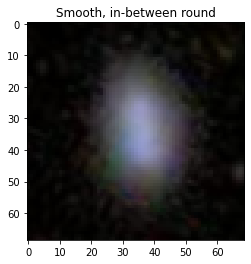

111


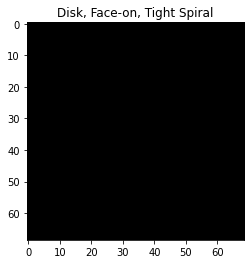

112


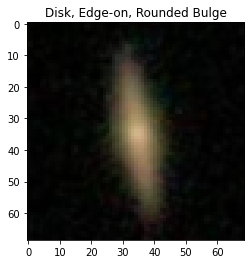

In [ ]:
def show_image(image_num, label_num):
    label_name = int(np.where(label_num==1)[0])
    label = galaxy10cls_lookup(label_name)
    print(i)
    plt.imshow(image_num)
    plt.title(label)
    plt.show()
for i in range(110,113):
  show_image(images[i], labels[i])

#saving some nice images to make feature maps from
#13,50?,55,83,89,93,111(good one),114,125,

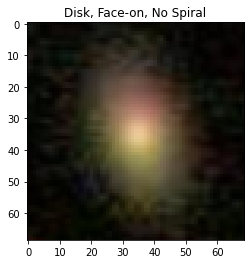

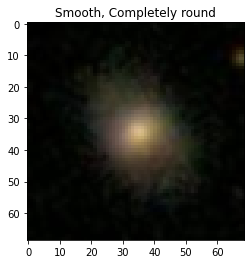

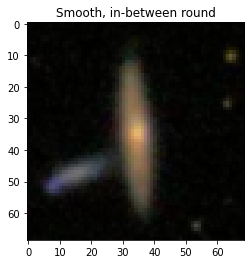

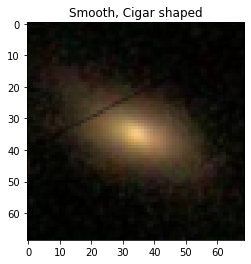

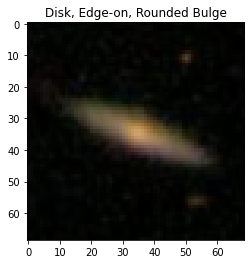

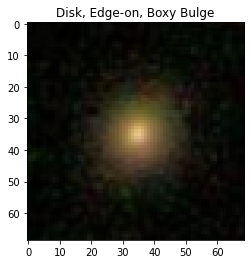

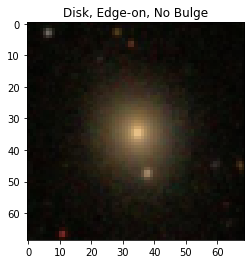

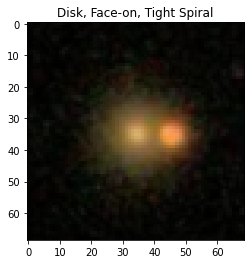

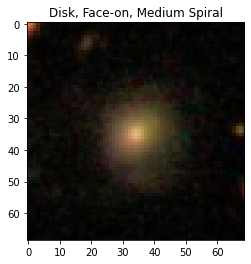

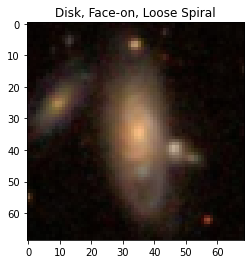

In [ ]:
def show_image(image_data,label):
    label = galaxy10cls_lookup(int(label))
    plt.imshow(image_data)
    plt.title(label)
    plt.show()
for i in range(0, 10):
    show_image(images[i], i)

#for i in range(0, 11):
#  for j in range(2):
#    show_image(images[j], i)

# **Train and test data sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.15)
print(X_train.shape)
print(y_train.shape)

(18517, 69, 69, 3)
(18517, 10)


# **CNN model "C2"**

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7), input_shape=(69,69,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 69, 69, 32)        4736      
                                                                 
 batch_normalization_6 (Batc  (None, 69, 69, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 34, 34, 64)        51264     
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 64)        102464    
                                                                 
 batch_normalization_7 (Batc  (None, 34, 34, 64)      

In [ ]:
model.layers

In [ ]:
layer_names = [layer.name for layer in model.layers]
layer_names

['conv2d',
 'batch_normalization',
 'max_pooling2d',
 'conv2d_1',
 'conv2d_2',
 'batch_normalization_1',
 'max_pooling2d_1',
 'conv2d_3',
 'batch_normalization_2',
 'max_pooling2d_2',
 'flatten',
 'dropout',
 'dense',
 'dense_1',
 'dense_2']

In [ ]:
feature_maps = feature_map_model.predict(input)

1/1 [==============================] - 0s 33ms/step


In [ ]:
for layer_name, feature_map in zip(layer_names, feature_maps):
  print(f"The shape of the {layer_name} is =======>> {feature_map.shape}")

The shape of the conv2d is =======>> (1, 63, 63, 32)
The shape of the batch_normalization is =======>> (1, 63, 63, 32)
The shape of the max_pooling2d is =======>> (1, 31, 31, 32)
The shape of the conv2d_1 is =======>> (1, 27, 27, 64)
The shape of the conv2d_2 is =======>> (1, 23, 23, 64)
The shape of the batch_normalization_1 is =======>> (1, 23, 23, 64)
The shape of the max_pooling2d_1 is =======>> (1, 11, 11, 64)
The shape of the conv2d_3 is =======>> (1, 9, 9, 128)
The shape of the batch_normalization_2 is =======>> (1, 9, 9, 128)
The shape of the max_pooling2d_2 is =======>> (1, 4, 4, 128)
The shape of the flatten is =======>> (1, 2048)
The shape of the dropout is =======>> (1, 2048)
The shape of the dense is =======>> (1, 256)
The shape of the dense_1 is =======>> (1, 256)
The shape of the dense_2 is =======>> (1, 10)


1/1 [==============================] - 0s 165ms/step
(1, 69, 69, 32)
(1, 34, 34, 32)
(1, 34, 34, 64)
(1, 34, 34, 64)
(1, 34, 34, 64)
(1, 17, 17, 64)
(1, 17, 17, 128)
(1, 17, 17, 128)
(1, 8, 8, 128)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


(1, 8192)
(1, 8192)
(1, 256)
(1, 256)
(1, 10)


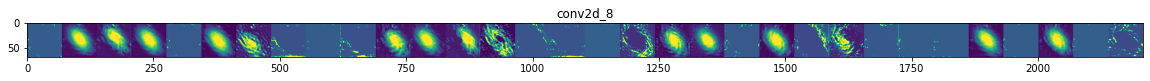

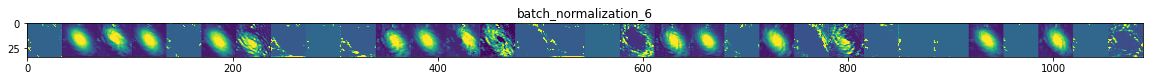

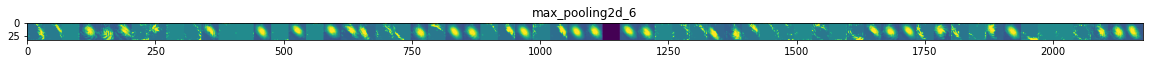

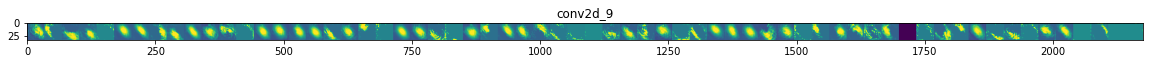

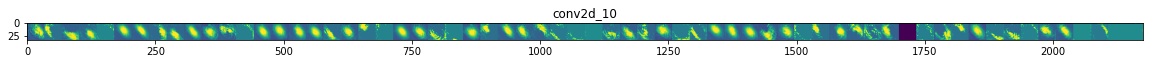

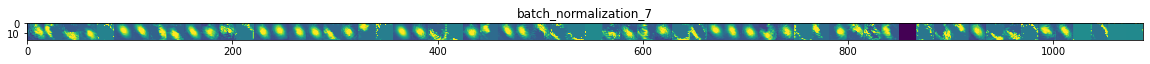

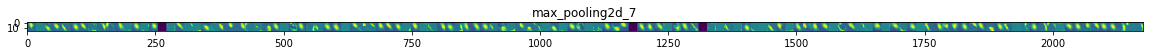

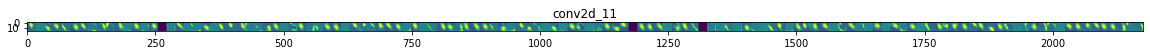

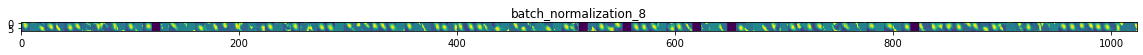

In [ ]:
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

x   = images[111]                         # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)           # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    print(feature_map.shape)
    if len(feature_map.shape) == 4 and ('conv2d' in layer_name):

        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1]  # number of features in the feature map
        #print(n_features)
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))

        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        conv2d_list = []
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid
            #a = display_grid[:, i * size : (i + 1) * size]
            
            

        #-----------------
        # Display the grid
        #-----------------

        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid  ( False )
        plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [ ]:
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    print(feature_map.shape)
    if len(feature_map.shape) == 4 and ('conv2d' == layer_name):

        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))

        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        conv2d_list = []
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid
            image_grid = display_grid[:, i * size : (i + 1) * size]
            conv2d_list.append(image_grid)
            
            

        #-----------------
        # Display the grid
        #-----------------

        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid  ( False )
        plt.imshow( display_grid, aspect='auto', cmap='viridis' )

# **Training**

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
579/579 [==============================] - 444s 765ms/step - loss: 1.1912 - accuracy: 0.5393 - val_loss: 1.3476 - val_accuracy: 0.5153
Epoch 2/20
579/579 [==============================] - 445s 768ms/step - loss: 0.8529 - accuracy: 0.6829 - val_loss: 0.8895 - val_accuracy: 0.6735
Epoch 3/20
579/579 [==============================] - 441s 761ms/step - loss: 0.7355 - accuracy: 0.7273 - val_loss: 0.7571 - val_accuracy: 0.7264
Epoch 4/20
579/579 [==============================] - 444s 766ms/step - loss: 0.6777 - accuracy: 0.7513 - val_loss: 0.6407 - val_accuracy: 0.7635
Epoch 5/20
579/579 [==============================] - 443s 764ms/step - loss: 0.6314 - accuracy: 0.7705 - val_loss: 0.7004 - val_accuracy: 0.7454
Epoch 6/20
579/579 [==============================] - 442s 763ms/step - loss: 0.6023 - accuracy: 0.7777 - val_loss: 0.7195 - val_accuracy: 0.7534
Epoch 7/20
579/579 [==============================] - 439s 758ms/step - loss: 0.5728 - accuracy: 0.7887 - val_loss: 0.7315 -